This notebook is to calculate the correlation among numeric features selected in Cleaning&Prepping_Data for machine learning analysis.

In [0]:
from pyspark.sql.functions import *
import pandas as pd
from pyspark.ml import PipelineModel
from pyspark.ml import Pipeline
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import seaborn as sns 
import matplotlib.pyplot as plt


In [0]:
yankees_df = spark.read.parquet("/FileStore/yankees/yankees_df_ml.parquet")

In [0]:
yankees_df.printSchema()

root
 |-- num_comments: long (nullable = true)
 |-- W/L: string (nullable = true)
 |-- comment_length: integer (nullable = true)
 |-- gilded_cm: long (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- sentiment_result: string (nullable = true)
 |-- score_cm: long (nullable = true)
 |-- score: long (nullable = true)
 |-- Opp: string (nullable = true)
 |-- R: long (nullable = true)
 |-- game_length: float (nullable = true)
 |-- D/N: string (nullable = true)
 |-- attendance: double (nullable = true)
 |-- cLI: double (nullable = true)
 |-- game_location: string (nullable = true)



In [0]:
yankees_df.dtypes

Out[10]: [('num_comments', 'bigint'),
 ('W/L', 'string'),
 ('comment_length', 'int'),
 ('gilded_cm', 'bigint'),
 ('controversiality', 'bigint'),
 ('sentiment_result', 'string'),
 ('score_cm', 'bigint'),
 ('score', 'bigint'),
 ('Opp', 'string'),
 ('R', 'bigint'),
 ('game_length', 'float'),
 ('D/N', 'string'),
 ('attendance', 'double'),
 ('cLI', 'double'),
 ('game_location', 'string')]

In [0]:
from pyspark.sql.types import *
## get numeric variables
numeric_variables = [f.name for f in yankees_df.schema.fields if isinstance(f.dataType, (IntegerType,	LongType, FloatType,DoubleType))]


In [0]:
## build correlation matrix

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_variables, outputCol=vector_col)
df_vector = assembler.transform(yankees_df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0] 
corr_matrix = matrix.toArray().tolist() 

corr_matrix_df = pd.DataFrame(data=corr_matrix, columns = numeric_variables, index=numeric_variables) 
corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(2)



<command-4335578569292412>:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(2)


,num_comments,comment_length,gilded_cm,controversiality,score_cm,score,R,game_length,attendance,cLI
num_comments,1.00,-0.05,0.00,-0.03,0.01,0.69,0.28,0.47,0.05,0.25
comment_length,-0.05,1.00,0.01,0.04,0.11,-0.04,-0.04,-0.02,-0.00,-0.02
gilded_cm,0.00,0.01,1.00,-0.00,0.02,0.00,0.00,0.00,0.00,0.00
controversiality,-0.03,0.04,-0.00,1.00,-0.10,-0.02,-0.03,-0.02,-0.00,-0.00
score_cm,0.01,0.11,0.02,-0.10,1.00,0.01,0.02,-0.02,-0.02,-0.00
score,0.69,-0.04,0.00,-0.02,0.01,1.00,0.29,0.22,0.30,0.48
R,0.28,-0.04,0.00,-0.03,0.02,0.29,1.00,0.34,0.03,-0.05
game_length,0.47,-0.02,0.00,-0.02,-0.02,0.22,0.34,1.00,0.24,0.04
attendance,0.05,-0.00,0.00,-0.00,-0.02,0.30,0.03,0.24,1.00,0.31
cLI,0.25,-0.02,0.00,-0.00,-0.00,0.48,-0.05,0.04,0.31,1.00


In [0]:
import os
PLOT_DIR = os.path.join("../../data", "plots")
CSV_DIR = os.path.join("../../data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

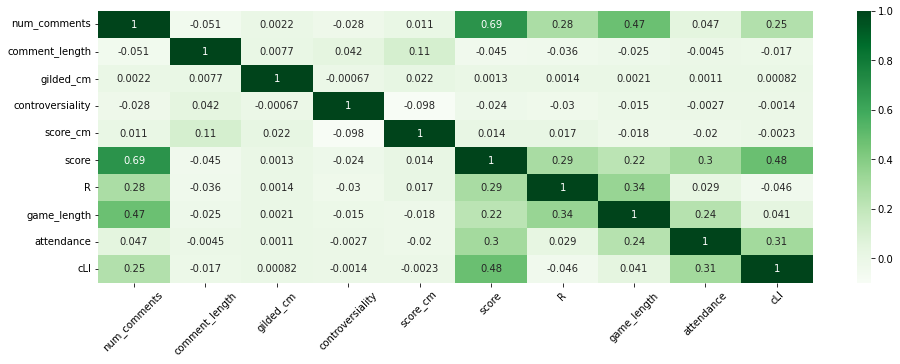

In [0]:
plt.figure(figsize=(16,5))  
sns.heatmap(corr_matrix_df, 
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values,  cmap="Greens", annot=True,
           )
plt.xticks(rotation=45) 

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, 'ml_feature_corr.png')
plt.savefig(plot_fpath)

plt.show()


In [0]:
# convert to vector column first
vector_colp = "corr_features"
assemblerp = VectorAssembler(inputCols=numeric_variables, outputCol=vector_colp)
df_vectorp = assemblerp.transform(yankees_df).select(vector_colp)

# get correlation matrix
matrixp = Correlation.corr(df_vectorp, vector_colp, method = 'pearson').collect()[0][0] 
corr_matrixp = matrixp.toArray().tolist() 

corr_matrix_dfp = pd.DataFrame(data=corr_matrix, columns = numeric_variables, index=numeric_variables) 
corr_matrix_dfp.style.background_gradient(cmap='coolwarm').set_precision(2)

<command-786002336139140>:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix_dfp.style.background_gradient(cmap='coolwarm').set_precision(2)


,num_comments,comment_length,gilded_cm,controversiality,score_cm,score,R,game_length,attendance,cLI
num_comments,1.00,-0.05,0.00,-0.03,0.01,0.69,0.28,0.47,0.05,0.25
comment_length,-0.05,1.00,0.01,0.04,0.11,-0.04,-0.04,-0.02,-0.00,-0.02
gilded_cm,0.00,0.01,1.00,-0.00,0.02,0.00,0.00,0.00,0.00,0.00
controversiality,-0.03,0.04,-0.00,1.00,-0.10,-0.02,-0.03,-0.02,-0.00,-0.00
score_cm,0.01,0.11,0.02,-0.10,1.00,0.01,0.02,-0.02,-0.02,-0.00
score,0.69,-0.04,0.00,-0.02,0.01,1.00,0.29,0.22,0.30,0.48
R,0.28,-0.04,0.00,-0.03,0.02,0.29,1.00,0.34,0.03,-0.05
game_length,0.47,-0.02,0.00,-0.02,-0.02,0.22,0.34,1.00,0.24,0.04
attendance,0.05,-0.00,0.00,-0.00,-0.02,0.30,0.03,0.24,1.00,0.31
cLI,0.25,-0.02,0.00,-0.00,-0.00,0.48,-0.05,0.04,0.31,1.00
